In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
start = datetime(2015, 1, 1)
end = datetime(2023, 1, 1)

df = yf.download('MSFT', start=start, end=end, interval='1d')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.534851,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.162090,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.572620,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.075409,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.254353,29645200
...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,237.112091,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,235.354095,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,232.940552,17457100


In [3]:
df['change'] = round(df['Close'].pct_change() * 100)
df

,Open,High,Low,Close,Adj Close,Volume,change
Date,,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.534851,27913900,NaN
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.162090,39673900,-1.0
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.572620,36447900,-1.0
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.075409,29114100,1.0
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.254353,29645200,3.0
...,...,...,...,...,...,...,...
2022-12-23,236.110001,238.869995,233.940002,238.729996,237.112091,21207000,0.0
2022-12-27,238.699997,238.929993,235.830002,236.960007,235.354095,16688600,-1.0
2022-12-28,236.889999,239.720001,234.169998,234.529999,232.940552,17457100,-1.0


In [4]:
df.fillna(0, inplace=True)

In [5]:
df[df['change'] > 5]

,Open,High,Low,Close,Adj Close,Volume,change
Date,,,,,,,
2015-04-24,45.660000,48.139999,45.650002,47.869999,41.792381,130933700,10.0
2015-08-26,42.009998,42.840000,41.060001,42.709999,37.777321,63408000,6.0
2015-10-23,52.299999,54.070000,52.250000,52.869999,46.763920,135227100,10.0
2016-01-29,54.730000,55.090000,54.000000,55.090000,49.055962,83611700,6.0
2017-10-27,84.370003,86.199997,83.610001,83.809998,77.998528,71066700,6.0
2018-03-26,90.610001,94.000000,90.400002,93.779999,88.127548,56396800,8.0
2018-10-25,106.550003,109.269997,106.150002,108.300003,102.606850,61646800,6.0
2018-12-26,95.139999,100.690002,93.959999,100.559998,95.685303,51634800,7.0
2020-03-02,165.309998,172.919998,162.309998,172.789993,167.300674,71030800,7.0


In [6]:
df['signal'] =  (df['change']).astype(int)

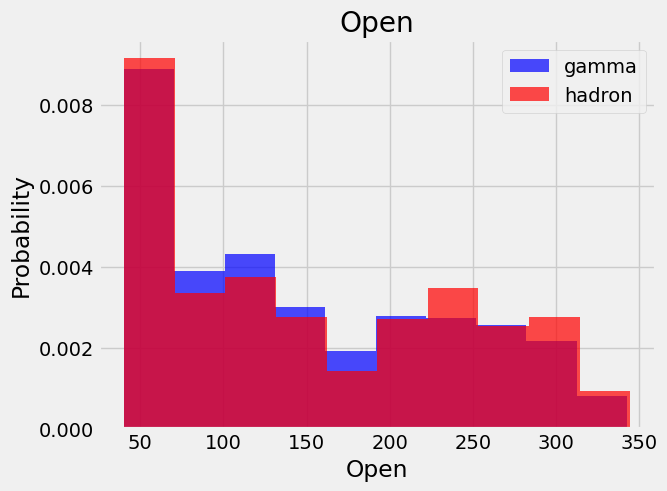

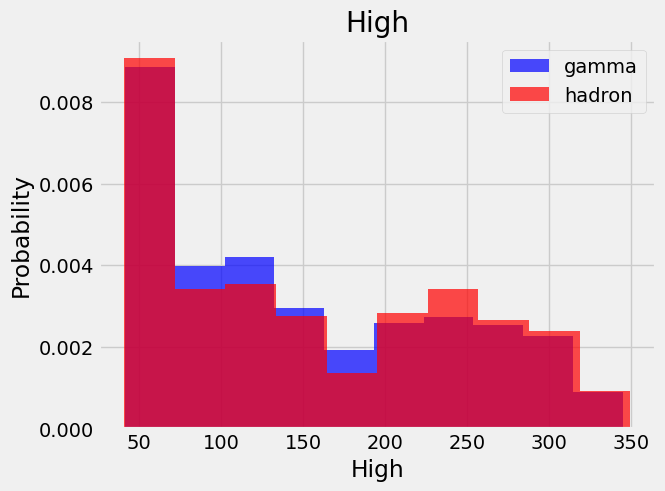

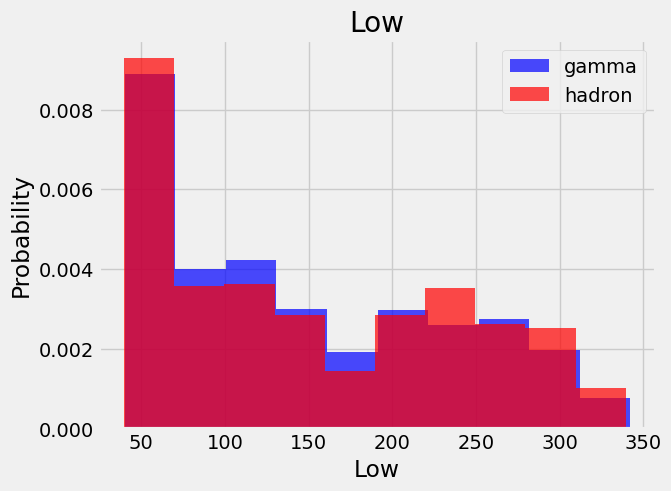

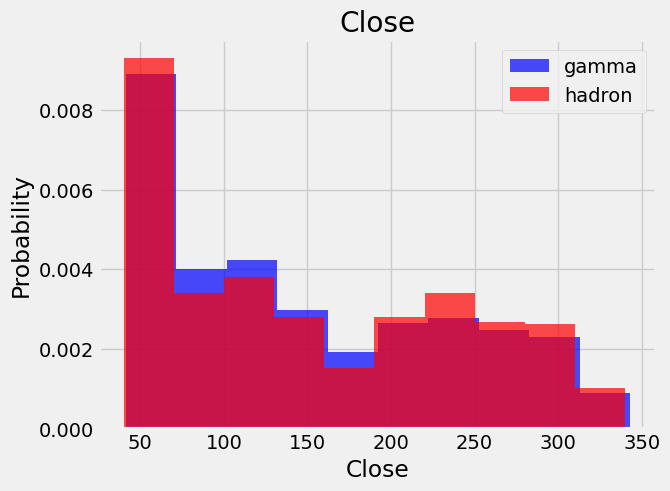

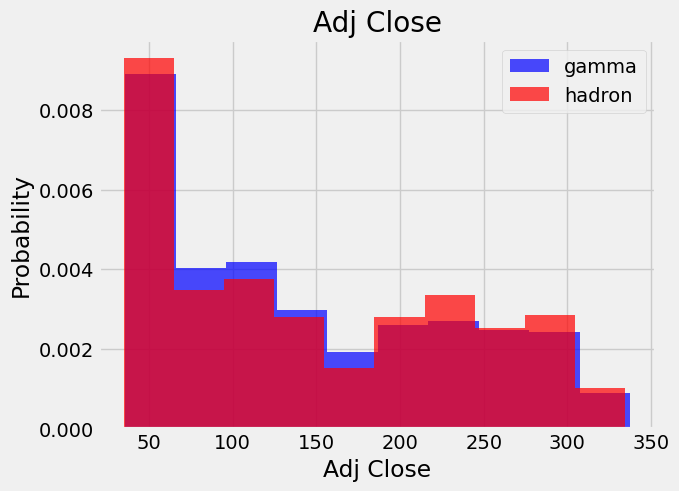

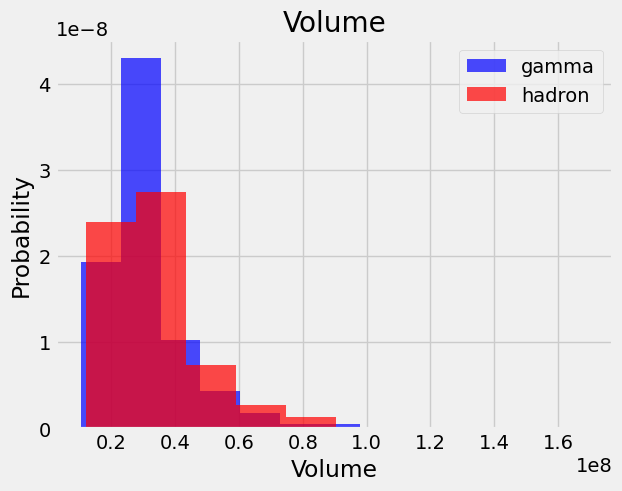

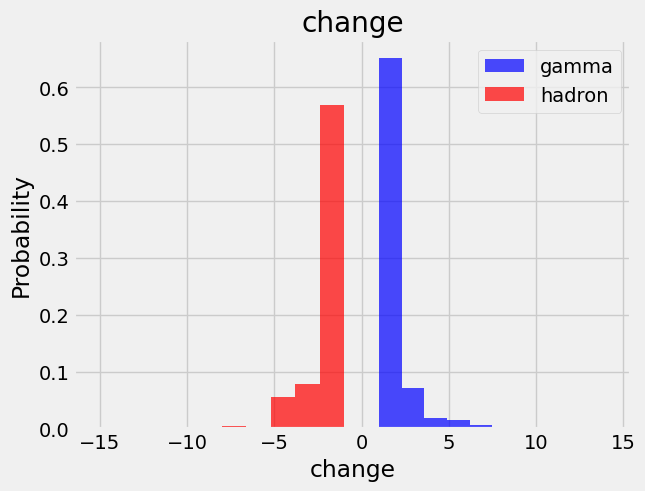

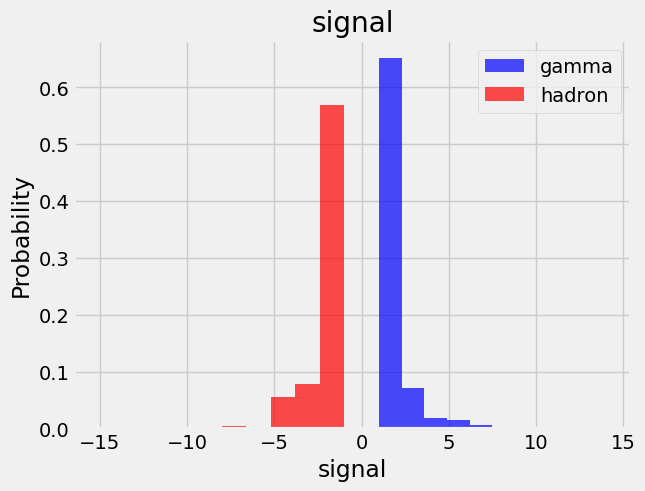

In [7]:
for label in df.columns:
    plt.hist(df[df['signal'] > 0][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['signal'] < 0][label], color='red', label='hadron', alpha=0.7, density=True)

    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [9]:
def scale_dataset(dataframe, oversample=False):
    x= dataframe[dataframe.columns[:-1]].values
    y= dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [10]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)